In [13]:
!pip install Pillow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

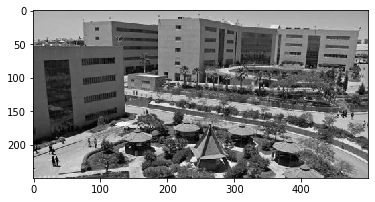

In [14]:
image = Image.open("GUC.jpg")
img = image.copy()
plt.imshow(img, cmap="gray")

In [15]:
def get_thresholds(img, n):
    img = np.array(img)
    rows, cols = img.shape
    
    # Divide the image to n+1 regions
    g = 255.0/(n+1)
    # include 0 and 255 in the thresholds array in order to check the region of the pixel
    Thresholds_n = np.zeros(n+2)
    num = 0
    for i in range(0, len(Thresholds_n)):
        Thresholds_n[i]=num
        num+=g
        
    loop_counter=0
    means = np.zeros(n+1)
    Thresholds_n1 = np.zeros(n+2)
    Thresholds_n1[len(Thresholds_n1)-1]=255
    while(not(np.array_equal(Thresholds_n,Thresholds_n1))):
        if(loop_counter!=0):
            Thresholds_n = Thresholds_n1
        # Update means
        for i in range(0, len(Thresholds_n)-1):
            arr = img[np.logical_and(img>=Thresholds_n[i], img<Thresholds_n[i+1])]
            if(arr.size==0):
                means[i]=0
            else:
                means[i] = np.sum(arr)/len(arr)
        # Update thresholds
        for i in range(1, len(Thresholds_n1)-1):
            Thresholds_n1[i]=(means[i-1]+means[i])/2
        loop_counter+=1
    
    return Thresholds_n[1: len(Thresholds_n)-1]

In [16]:
def get_segmented_img(img, threshold):
    img = np.array(img)
    rows, cols = img.shape

    for i in range(0, rows):
        for j in range(0, cols):
            if(img[i][j]<threshold):
                img[i][j]=0
            else:
                img[i][j]=1
    return img

In [17]:
def get_final_img(img, thresholds):
    ranges = np.concatenate(([0], thresholds, [255]))
    step = 256/(len(thresholds)+1)
    num = 0
    result = img
    for i in range(0,len(ranges)-1):
        result = np.where(np.logical_and(img>=ranges[i], img<=ranges[i+1]), num, result)
        num+=step
    return result

In [18]:
def get_solution(img, n):
    img = np.array(img)
    
    # 1. get thresholds 
    thresholds = get_thresholds(img, n)
    thresholds_copy=thresholds
    filename = "Thresholds_"+str(n)+ ".txt"
    f = open(filename,"w+")
    for t in thresholds:
        f.write("%f\r\n" % (t))
    f.close()
            
    # 2. get a binary image for each segment
    segmented_images = []
    for i in range(0, len(thresholds)):
        segment = get_segmented_img(img, thresholds[i])
        segmented_images.append(segment)
        plt.title("Segment_"+str(i))
        plt.imshow(segment, cmap="gray")
        plt.savefig("GUC_"+str(len(thresholds))+"_"+str(i)+".jpg")
        plt.show()
            
    # 3. get one segmented gray-scale image
    final_result = get_final_img(img, thresholds)
    plt.title("Final gray-scale segmented image")
    plt.imshow(final_result, cmap="gray")
    plt.savefig("GUC_"+str(len(thresholds))+".jpg")
    plt.show()
    
    
    return thresholds, segmented_images, final_result
    

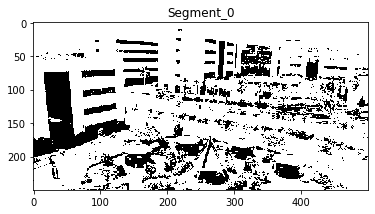

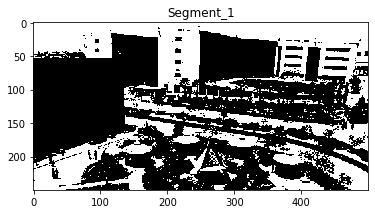

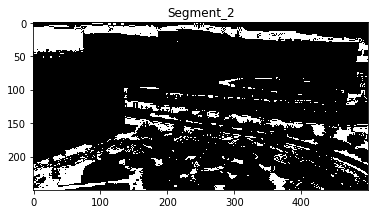

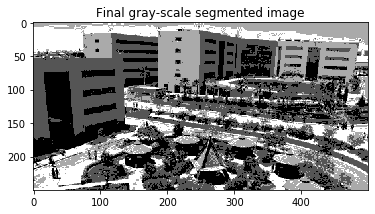

[ 65.94174498 124.65026325 177.68015987]


In [19]:
thresholds3, segmented_images3, final_result3 = get_solution(img, 3)
print(thresholds3)

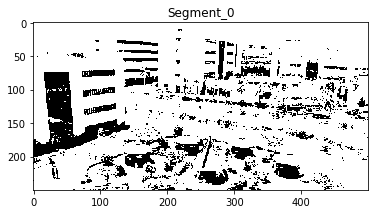

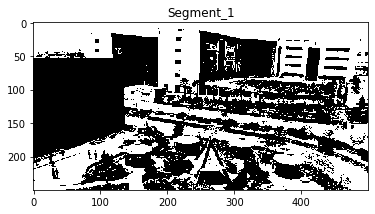

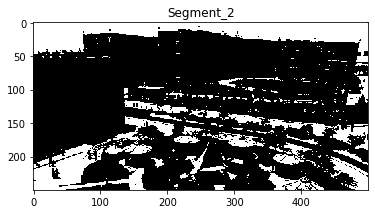

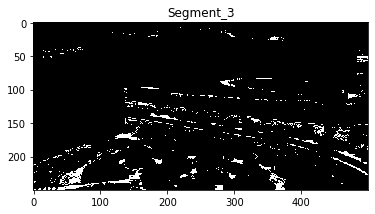

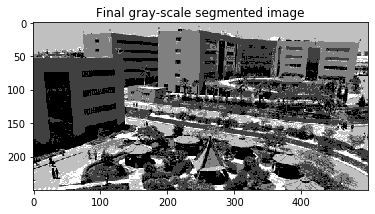

[ 57.94425189 105.28032348 153.02272145 194.15107966]


In [21]:
thresholds4, segmented_images4, final_result4 = get_solution(img, 4)
print(thresholds4)